In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import plotly.express as px

In [2]:
df = pd.read_csv('Apple-Fitness-Data.csv')
df.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [7]:
missing = df.isnull().sum()
print(missing)
df.dtypes

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64


Date                                  object
Time                                  object
Step Count                             int64
Distance                             float64
Energy Burned                        float64
Flights Climbed                        int64
Walking Double Support Percentage    float64
Walking Speed                        float64
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Date                                 datetime64[ns]
Time                                         object
Step Count                                    int64
Distance                                    float64
Energy Burned                               float64
Flights Climbed                               int64
Walking Double Support Percentage           float64
Walking Speed                               float64
dtype: object

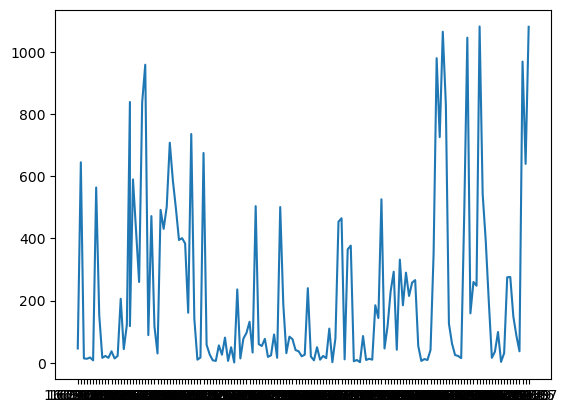

In [15]:
x = df['Time']
y = df['Step Count']

#plt.plot(x, y, marker='o', linestyle='-', color='b', label='Average AQI')
plt.plot(x,y)
plt.show()

In [17]:
fig = px.line(df, x = 'Time', y = 'Step Count', title = 'Step Count over Time')

fig.show()


In [18]:
fig = px.line(df, x='Time', y='Distance', title = 'Distnce over Time')

fig.show()

In [19]:
fig = px.line(df, x='Time', y='Energy Burned', title = 'Energy Burned over Time')

fig.show()

In [22]:
fig = px.line(df, x='Time', y='Walking Speed', title = 'Walking Speed over Time')

fig.show()

In [35]:

avg_step_count_per_day = df.groupby("Date")["Step Count"].mean().reset_index()

fig = px.bar(avg_step_count_per_day, x = "Date", y="Step Count", title = "Average Step Count Over Time")
fig.update_xaxes(type='category')
              
fig.show()

In [36]:
df['walking_efficiency'] = df['Distance'] / df['Step Count']

fig = px.line(df, x='Time', y='walking_efficiency', title='Walking Efficiency Over Time')

fig.show()

In [45]:
time_intervals = pd.cut(pd.to_datetime(df['Time']).dt.hour,
                                      bins = [0, 12, 18, 24],
                                      labels = ['Morning', 'Afternoon', 'Evening'],
                                      right = False)

df['Time Interval'] = time_intervals

#print(df['time_interval'])
fig = px.scatter(df, x='Step Count', y = 'Walking Speed', color = 'Time Interval', 
                 title = 'Speed Count and Walking Speed variation by time interval', trendline = 'ols')

fig.show()

In [52]:
daily_avg_metrics = df.groupby('Date').mean().reset_index()
#print(daily_avg_metrics)

daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=['Date'], 
                                               value_vars = ['Step Count', 'Distance', 'Energy Burned', 'Flights Climbed', 
                                                            'Walking Double Support Percentage', 'Walking Speed'])
#print(daily_avg_metrics_melt)
fig = px.treemap(daily_avg_metrics_melted, 
                 path=["variable"], values = 'value',
                 color="variable",
                 hover_data=["value"],
                 title="Daily Averages for Different Metrics")
              
fig.show()

/var/folders/kk/l7qpv_zs0q1b1zqj_4frh_dh0000gn/T/ipykernel_69036/3772836160.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [53]:
metrics_to_visualize = ['Distance', 'Energy Burned', 'Flights Climbed', 
                                                            'Walking Double Support Percentage', 'Walking Speed']

daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=['Date'], 
                                               value_vars = metrics_to_visualize)
#print(daily_avg_metrics_melt)
fig = px.treemap(daily_avg_metrics_melted, 
                 path=["variable"], values = 'value',
                 color="variable",
                 hover_data=["value"],
                 title="Daily Averages for Different Metrics")
              
fig.show()